In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score



**Problem 1**

- a) Let’s try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice. 

- b) Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2).

- c) Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). 

- d) Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5). 

In [3]:
#Reading dataset
df = pd.read_csv('~/UW/IMT_574/Week5/Homework/dermatology.csv',  sep='\t')
df_dermatology = df.copy()
df_dermatology.head()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
#Checking for missing values to impute
#df_dermatology.isna().any()

In [5]:
# df_dermatology.info()
# pd.set_option('display.max_rows', None)

In [6]:
#Imputing NaN values with mean values
df_dermatology['Age'].replace('?', 0, inplace = True)
df_dermatology.replace('NA', np.nan, inplace=True)
df_dermatology.dropna(how='all', inplace=True)

df_dermatology.head()


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [7]:
df_dermatology['Age'] = df_dermatology['Age'].astype(int)
# df_dermatology.info()

In [8]:
#df_dermatology.isna().any()

In [9]:
#Splitting training(70%) and testing data (30%), using only the age feature
X = df_dermatology.Age.copy()
X = sm.add_constant(X) 
y = df_dermatology.Disease.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

a) Gradient Descent

In [10]:
#Training the LR model
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disease   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     17.49
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.99e-05
Time:                        13:48:02   Log-Likelihood:                -471.86
No. Observations:                 256   AIC:                             947.7
Df Residuals:                     254   BIC:                             954.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7683      0.233     16.151      0.000       3.309       4.228
Age           -0.0258      0.006     -4.182      0.000      -0.038      -0.014
==============================================================================
Omnibus:                      118.613   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.943
Skew:                           0.155   Prob(JB):                     0.000345
Kurtosis:                       1.817   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, we see that the features ('Itching', 'Koebner', 'Follicular', 'Knee', 'PNL', 'Fibrosis', 'Clubbing', 'Elongation', 'Thinning', 'Munro', 'Disapperance') are not statistically significant, so we can discard them by Backward Selection.

In [11]:
#Splitting training(70%) and testing data (30%)
# X = df_dermatology.drop(['Disease', 'Itching', 'Koebner ', 'Follicular', 'Knee', 'PNL', 'Fibrosis', 'Clubbing'
#                          , 'Elongation', 'Thinning', 'Munro', 'Disapperance'] ,axis = 1).copy()
# X = sm.add_constant(X) 
# y = df_dermatology.Disease.copy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [12]:
#Training the LR model
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disease   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     17.49
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.99e-05
Time:                        13:48:02   Log-Likelihood:                -471.86
No. Observations:                 256   AIC:                             947.7
Df Residuals:                     254   BIC:                             954.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7683      0.233     16.151      0.000       3.309       4.228
Age           -0.0258      0.006     -4.182      0.000      -0.038      -0.014
==============================================================================
Omnibus:                      118.613   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.943
Skew:                           0.155   Prob(JB):                     0.000345
Kurtosis:                       1.817   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Predict with LR model
y_pred_lr = model1.predict(X_test)


In [14]:
def GradientDescent(X,y,theta,lr,n_iters):
    m = len(y)
    costs = [] 
    for _ in range(n_iters):
        y_hat = np.dot(X,theta)
        theta = theta -(1/m) * lr * (np.dot(X_train.T,(y_hat - y_train)))
        cost = (1/2*m) * np.sum(np.square(y_hat-y))
        costs.append(cost)
    return theta, costs

In [15]:
#learning rate
alpha = 0.01

n_iters = 100
theta =np.random.randn(X_train.shape[1])

In [16]:
thetas,costs=GradientDescent(X_train,y_train,theta,alpha,n_iters)

print('Values of thetas:' , thetas)


Values of thetas: [-1.76394597e+110 -7.31219137e+111]


In [17]:
print('Costs:' ,costs)

Costs: [4942060.268160615, 846618643.3899152, 149553149178.10678, 26422858282133.883, 4668361305619295.0, 8.248009041898511e+17, 1.4572491009964186e+20, 2.574651569327633e+22, 4.548865872628559e+24, 8.036885834834919e+26, 1.4199480866391436e+29, 2.508748550353869e+31, 4.432429148729937e+33, 7.831166720849557e+35, 1.38360186146042e+38, 2.444532442324332e+40, 4.3189728404012425e+42, 7.630713372078332e+44, 1.3481859858467074e+47, 2.3819600656005345e+49, 4.2084206583355105e+51, 7.435391001418771e+53, 1.313676645762053e+56, 2.3209893458075564e+58, 4.100698265993192e+60, 7.245068271896241e+62, 1.280050636735262e+65, 2.26157928554274e+67, 3.995733229617407e+69, 7.05961720835147e+71, 1.2472853482569528e+74, 2.2036899368085608e+76, 3.893454969528665e+78, 6.878913111388564e+80, 1.215358748575994e+83, 2.1472823741511738e+85, 3.7937947126662727e+87, 6.702834473525678e+89, 1.1842493698850917e+92, 2.092318668486459e+94, 3.6966854463445705e+96, 6.531262897492135e+98, 1.1539362938856128e+101, 2.038761

In [18]:
y_pred_gd = np.dot(X_test, theta)
y_pred_gd

array([ -5.04928841, -12.76145549,  -4.2780717 ,  -1.70734934,
       -12.50438326,  -2.47856605, -15.33217786, -11.99023879,
        -8.90537195,  -2.47856605,   0.09215631, -13.27559997,
       -12.76145549, -14.30388891,  -7.87708301,  -5.04928841,
       -14.56096115, -17.13168351, -10.19073313, -16.61753904,
        -5.56343288,  -7.1058663 ,  -2.99271052,  -2.99271052,
        -9.16244419, -17.90290022, -10.96194984, -12.76145549,
       -13.01852773, -14.81803338,  -7.62001077,  -6.07757735,
        -7.62001077,  -4.02099947,  -6.33464959, -13.27559997,
       -15.33217786,  -1.70734934,  -6.33464959, -16.10339456,
       -11.47609431, -10.96194984,  -6.33464959,  -9.67658866,
       -13.27559997,  -6.84879406, -10.96194984,  -6.84879406,
        -8.39122748, -10.70487761, -10.19073313,  -5.56343288,
        -9.16244419,  -9.16244419, -10.70487761,  -7.87708301,
       -14.04681668,  -7.62001077, -17.38875574,  -8.64829972,
       -10.70487761, -14.04681668, -12.76145549, -19.18

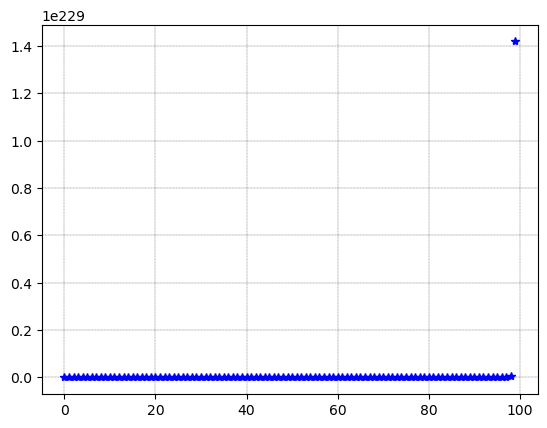

In [19]:
cost=costs
# Plot cost 
plt.plot(range(len(cost)), cost, 'b*')
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
plt.show()

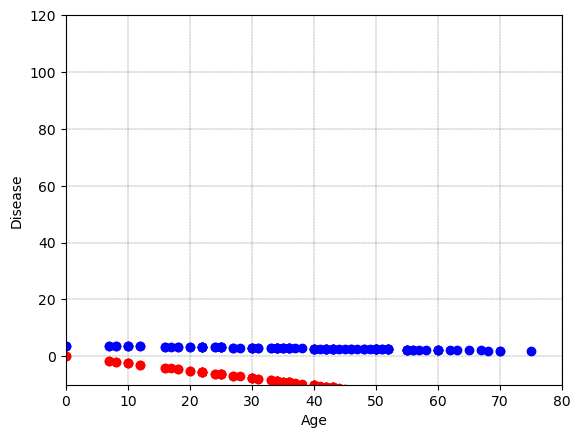

In [20]:
plt.scatter(X_test.Age, y_pred_lr, color = 'b')
plt.xlabel("Age")
plt.ylabel("Disease")

# Draw predicted line
plt.scatter(X_test.Age, y_pred_gd, color='r')
plt.axis([0,80,-10,120])
plt.grid(color = 'k', linestyle = '--', linewidth = 0.2)
plt.show()

In [21]:
# print(y_pred_lr)

b) Random Forest

In [22]:
#Splitting training(70%) and testing data (30%), using all the labels
X = df_dermatology.drop(['Disease'],axis = 1).copy()
y = df_dermatology.Disease.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [23]:
def get_metrics(y_test, y_pred, legend):
    mse = mean_squared_error(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(legend)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

In [24]:
from sklearn.tree import plot_tree


def plot_graphs(model, legend):
    plt.figure()
    plot_tree(model, filled=True)
    plt.title(legend)
    plt.show()

In [25]:
#Hyperparameters 
#num_estimators=number of decission trees
depth = 5
num_estimators=5

In [26]:
#Random forest trained on all Clinical and Histopathological features
model2 = RandomForestRegressor(n_estimators=num_estimators, max_depth=depth)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [27]:
y_pred_rf = model2.predict(X_test)

In [28]:
#R-squared  = > The nearer to 1, the better
get_metrics(y_test, y_pred_rf,"Scores for random forest trained on all Clinical and Histopathological features, MaxDepth=5")

Scores for random forest trained on all Clinical and Histopathological features, MaxDepth=5
Mean Squared Error (MSE): 0.22566160542186686
Mean Absolute Error (MAE): 0.23867257257663724
R-squared (R2): 0.913725380719625


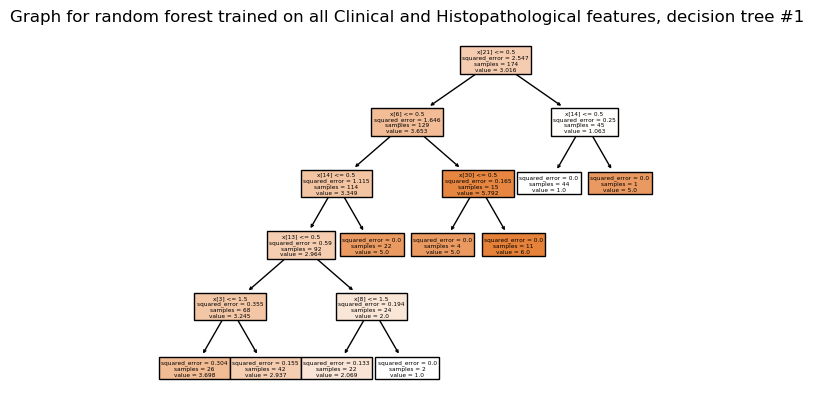

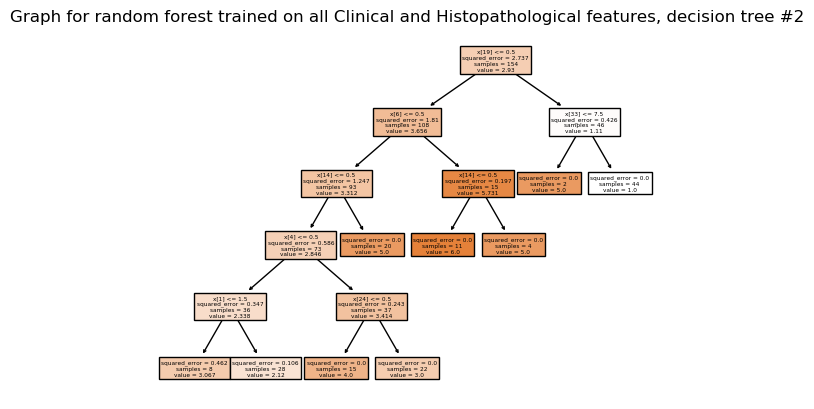

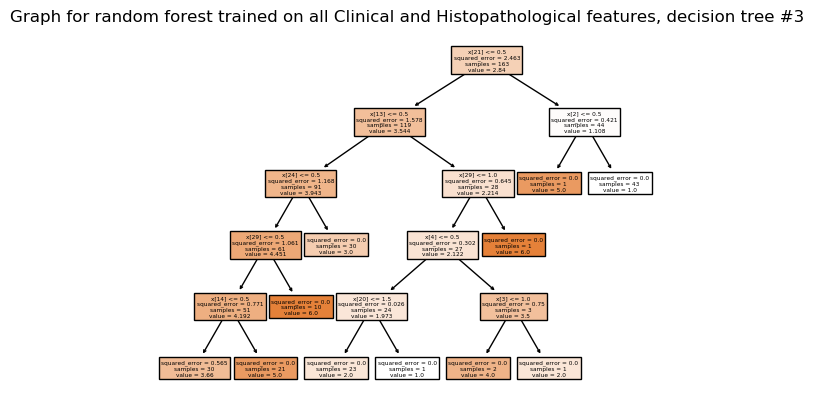

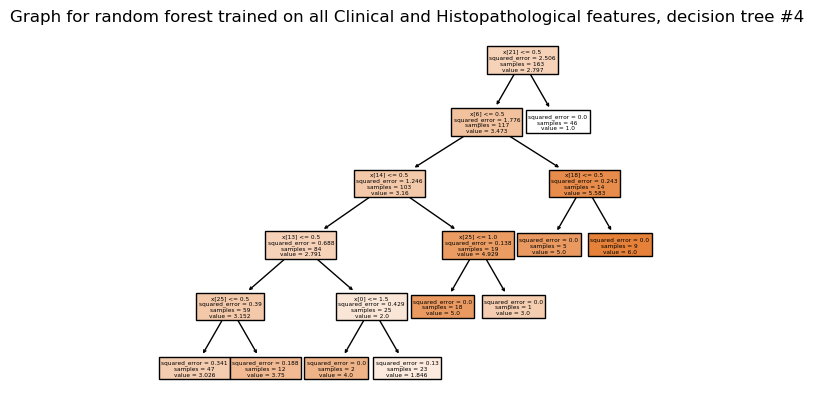

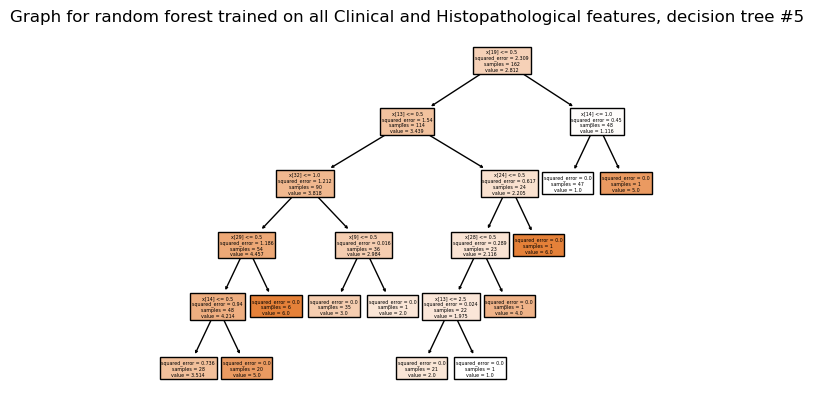

In [29]:
for i in range(num_estimators):
    plot_graphs(model2.estimators_[i], "Graph for random forest trained on all Clinical and Histopathological features, decision tree #" + str(i+1))

c) KNN

In [30]:
def knn_plot(accuracies):

    accuracy_list = sorted(accuracies.items())
    x, y = zip(*accuracy_list) 
    
    plt.xlabel("Number of K Neighbors")
    plt.ylabel("Accuracy")
    plt.plot(x, y, color='red')
    plt.show()  

In [31]:
#Training a model using K-Nearest Neighbors
from sklearn.model_selection import cross_val_score

accuracy_dict=dict()
k_arr=[i for i in range(1, 10)]

for k in k_arr:
    model3 = KNeighborsClassifier(n_neighbors=k)
    model3.fit(X_train, y_train)

    y_pred_knn = model3.predict(X_test)

    score = cross_val_score(model3, X, y, cv=8)

    acc_score = np.mean(score)

    accuracy_dict[k] = (np.mean(acc_score))

    print('Accuracy for K=', k, ':', np.mean(acc_score))

Accuracy for K= 1 : 0.885144927536232
Accuracy for K= 2 : 0.8769323671497584
Accuracy for K= 3 : 0.885144927536232
Accuracy for K= 4 : 0.8853260869565217
Accuracy for K= 5 : 0.852596618357488
Accuracy for K= 6 : 0.8578502415458937
Accuracy for K= 7 : 0.8524758454106279
Accuracy for K= 8 : 0.8414251207729468
Accuracy for K= 9 : 0.8195652173913044


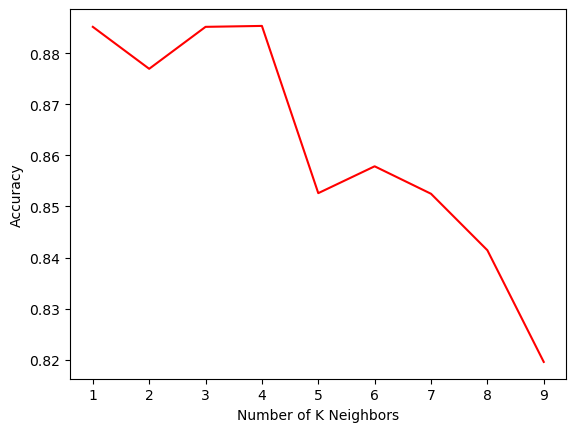

In [32]:
knn_plot(accuracy_dict)

From here, it appears that the optimal value for k is 4 with the highest accuracy score (0.8853260869565217). Will use k=4 for our classification

In [33]:
k=4

model3 = KNeighborsClassifier(n_neighbors=k)
model3.fit(X_train, y_train)

y_pred_knn = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

print("Accuracy score when k=4 :", accuracy)
print("Precision score when k=4 :", precision)
print("Recall score when k=4 :", recall)

Accuracy score when k=4 : 0.8909090909090909
Precision score when k=4 : 0.8943722943722944
Recall score when k=4 : 0.8909090909090909


d.1) Agglomerative

d.2) K-Means